# WINE QUALITY DATASET

### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [4]:
import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#### Reading input and separating the data with semicolons

In [5]:
sample_df = pd.read_csv('F:/MSIT II/ML/winequality-white.csv',sep=";")

In [6]:
sample_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
sample_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### The below correlations show how two variables are related and how they may change or not change together.

In [40]:
correlations = sample_df.corr(method='pearson')
print(correlations)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [9]:
sample_df[['alcohol', 'quality']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=True)

,quality,alcohol
0,3,10.345000
1,4,10.152454
2,5,9.808840
3,6,10.575372
4,7,11.367936
5,8,11.636000
6,9,12.180000


In [10]:
sample_df[['pH', 'quality']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=True)

,quality,pH
0,3,3.187500
1,4,3.182883
2,5,3.168833
3,6,3.188599
4,7,3.213898
5,8,3.218686
6,9,3.308000


In [11]:
sample_df[['citric acid', 'quality']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=True)

,quality,citric acid
0,3,0.336000
1,4,0.304233
2,5,0.337653
3,6,0.338025
4,7,0.325625
5,8,0.326514
6,9,0.386000


In [12]:
sample_df[['density', 'quality']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=True)

,quality,density
0,3,0.994884
1,4,0.994277
2,5,0.995263
3,6,0.993961
4,7,0.992452
5,8,0.992236
6,9,0.991460


In [15]:
train_df = sample_df.iloc[:,:-1]

In [16]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


#### Converting the training dataset and quality attributes as arrays

In [17]:
X = train_df.as_matrix()
print(X[:3])

[[  7.00000000e+00   2.70000000e-01   3.60000000e-01   2.07000000e+01
    4.50000000e-02   4.50000000e+01   1.70000000e+02   1.00100000e+00
    3.00000000e+00   4.50000000e-01   8.80000000e+00]
 [  6.30000000e+00   3.00000000e-01   3.40000000e-01   1.60000000e+00
    4.90000000e-02   1.40000000e+01   1.32000000e+02   9.94000000e-01
    3.30000000e+00   4.90000000e-01   9.50000000e+00]
 [  8.10000000e+00   2.80000000e-01   4.00000000e-01   6.90000000e+00
    5.00000000e-02   3.00000000e+01   9.70000000e+01   9.95100000e-01
    3.26000000e+00   4.40000000e-01   1.01000000e+01]]


In [18]:
y_df = sample_df["quality"].values

In [19]:
print(y_df[:10])

[6 6 6 6 6 6 6 6 6 6]


#### Plotting the distribution of wine ratings with the help of numpy array

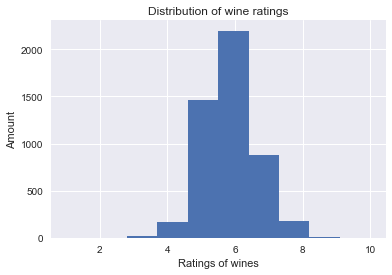

In [20]:
plt.hist(y_df, range=(1, 10))

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

#### The below histogram shows the alcohol levels for different quality ratings. 

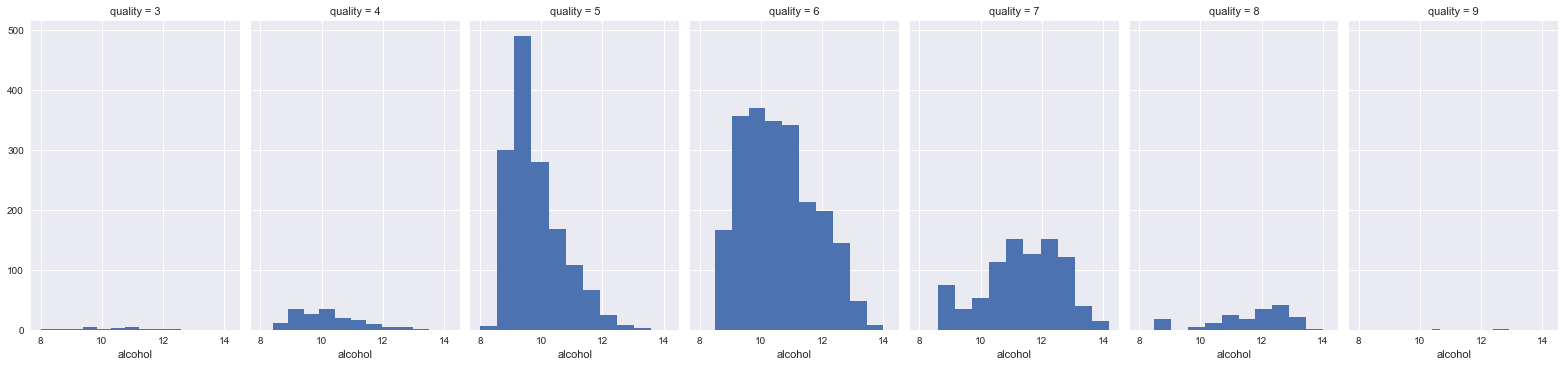

In [41]:
g = sns.FacetGrid(sample_df, col='quality',size=5.2,aspect=0.6)
g.map(plt.hist, 'alcohol')

#### The histogram below depicts the pH levels for various quality ratings

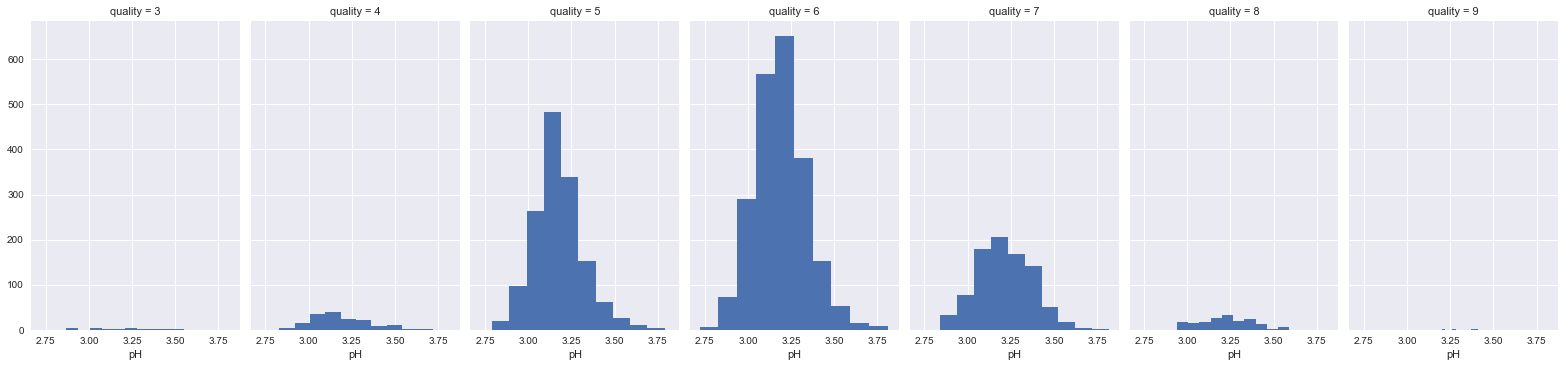

In [42]:
g = sns.FacetGrid(sample_df, col='quality',size=5.2,aspect=0.6)
g.map(plt.hist, 'pH')

#### The histogram below depicts the sulphate levels for different quality ratings

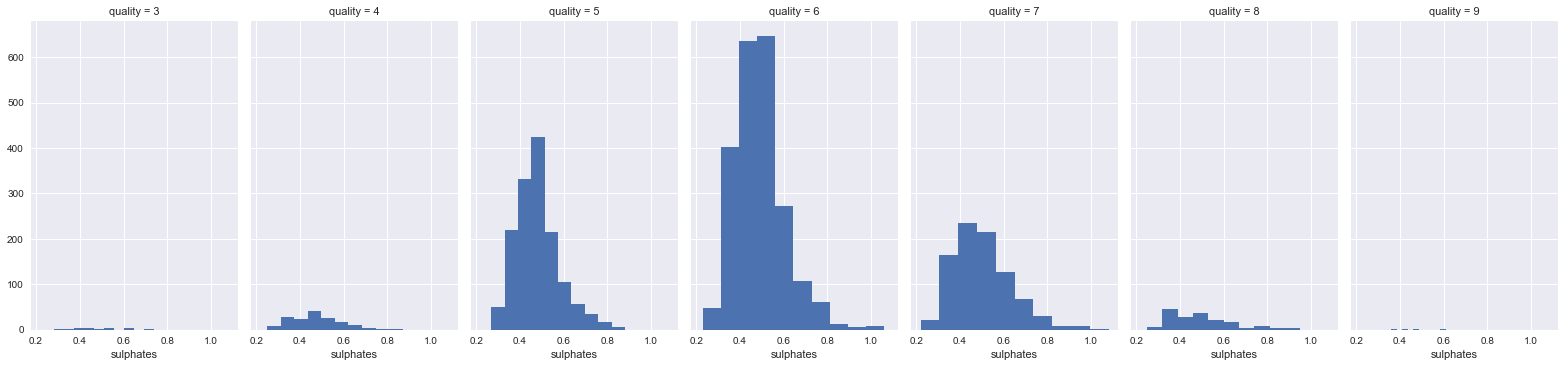

In [43]:
g = sns.FacetGrid(sample_df, col='quality',size=5.2,aspect=0.6)
g.map(plt.hist, 'sulphates')

#### If Quality rating is more than or equal to 7, we grade the wine as good quality and otherwise we grade it as bad quality

In [21]:
y = np.array([1 if i>=7 else 0 for i in y_df])
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [48]:
train_df["quality"] = y

#### The below histogram depicts that bad quality wine is inclined towards alcohol level 9.

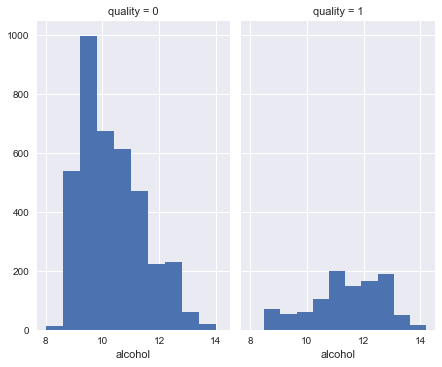

In [49]:
g = sns.FacetGrid(train_df, col='quality',size=5.2,aspect=0.6)
g.map(plt.hist, 'alcohol')

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10))

In [25]:
print(scores[0])
print(scores[1])

[ 0.76122449  0.81020408  0.77346939  0.77142857  0.76530612  0.78979592
  0.69387755  0.7122449   0.76482618  0.70347648]
[ 0.79591837  0.79795918  0.79387755  0.78571429  0.78571429  0.78979592
  0.7755102   0.78571429  0.78732106  0.79754601]


#### The below diagram is a boxplot depicting forest classification score as function of number of trees

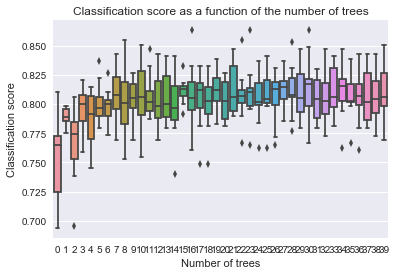

In [26]:
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

In [27]:

scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10, scoring='f1'))

#### To remove the skewed data points, we consider the f1 scoring parameter.

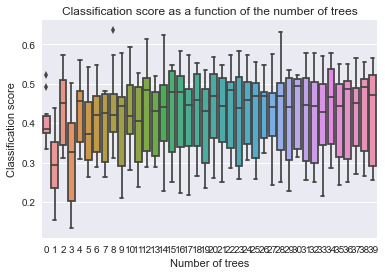

In [28]:
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

#### So taking conclusions from the above boxplot, the number of trees to used for our random forest is approximately 15 trees.